# 2.1 실수자료로의 전환(vectorization)
- 범주형, 텍스트, 이미지 자료 등을 실수로 구성된 형태로의 전환(범주의 수량화)
- 새로운 특성변수의 생성
- 결측 자료의 대체(imputation)

In [4]:
### 범주형 자료(Dictionary data)의 수량화
### DictVectorizer 클래스를 이용
x=[{'city':'Seoul','temp':10.0}, {'city':'Dubai','temp':33.5},{'city':'LA','temp':20.0}]

x

[{'city': 'Seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [6]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False) # vec로 객체화
vec.fit_transform(x) # x를 범주형 수량화 자료로 변환, sparse=False
### 이와 같은 수량화를 one-hot vector라고 한다.

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [14]:
vec1 = DictVectorizer() # vec1로 객체화, 메모리를 줄이기 위해 sparse=True
x1 = vec1.fit_transform(x) 

x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [10]:
### spares압축을 풀어서 원래의 범주형 자료를 출력하고 특성변수의 이름을 확인

x1.toarray # 배열로 변경
vec1.get_feature_names_out()

array(['city=Dubai', 'city=LA', 'city=Seoul', 'temp'], dtype=object)

__sparse에 대한 부연 설명__
- 위 예제에서는 city가 3개 뿐인 단순한 자료이지만, city가 매우 큰 수로 늘어난다면 범주형 변수가 매우 큰 수로 생기게 되어 x 변수가 지나치게 늘어나게 된다.
- 분석하고자 하는 데이터에 이와 같은 범주형 변수가 여러 개 있다면 x변수의 크기로 인해 연산을 위한 메모리 공간이 부족할 수 있다.
- 만일 city가 1000개이면 표본 하나는 온도와 오직 하나의 1, 그리고 999개의 0으로 구성된 범주형 특성변수로 구성되게 된다.
- 이처럼 몇 개의 변수값을 제외하고 모든 다른 변수값이 같으면 이를 sparse 관측치라고 하며, 범주형 수량화는 대표적인 sparse 데이터이다.
- sparse=True를 부여해줌으로써 온도 값의 위치인 [행, 열], 그리고 범주형 자료에서 1의 위치인 [행, 열]을 key로 하고 이 key에 대응하는 온도 값과 1을 부여해주면 메모리 공간을 획기적으로 줄일 수 있다.

In [16]:
### 텍스트 자료의 수량화
### CountVectorizer 클래스 이용

text=['떴다 떴다 비행기 날아라 날아라',
     '높이 높이 날아라 우리 비행기',
     '내가 만든 비행기 날아라 날아라',
     '멀리 멀리 날아라 우리 비행기']

text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer() # vec2로 객체화, sparse=True
t=vec2.fit_transform(text).toarray() # text를 수량화 배열 자료로 변환
import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names_out())

t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


__Count vs. TFIDF__
- Count : 오직 단어의 출현 횟수만으로는 is, the, a 같은 중요하지 않는 정보를 제공하지 않는 것도 포함되기 때문에 문제가 될 수 있다.
- TFIDF : 출현 비중이 높은 단어에게는 상대적으로 낮은 가중치를 주고, 반대로 출현 비중이 낮은 단어에는 상대적으로 높은 가중치를 부여한다.

In [21]:
### TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer() # tfid로 객체화
x2 = tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names_out())

x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


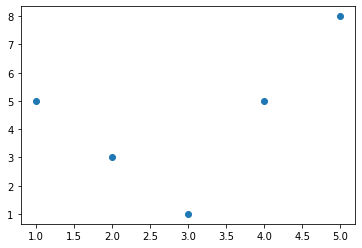

In [22]:
### 특성변수 생성
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([5,3,1,5,8])

plt.plot(x, y, 'o') # 선형회귀를 하기에는 부적합

In [28]:
from sklearn.preprocessing import PolynomialFeatures
fg=PolynomialFeatures(degree=3, include_bias=True) # 3차식으로 근사, include_bias는 절편항 여부
x1=fg.fit_transform(x[:,np.newaxis]) # scikit-learn은 2차원 자료만 작동하므로 2차원 자료인 열벡터로 수정

x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

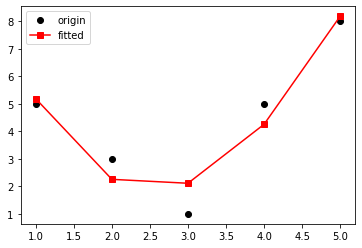

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1, y)
yfit = reg.predict(x1) # 적합 값
plt.plot(x, y, 'ko', label='origin') # ko란 검은색 동그라미
plt.plot(x, yfit, 'rs-', label='fitted') # rs-란 빨간색 네모를 줄로 잇기
plt.legend(loc='best') # 범주를 제일 적절한 곳으로 설정
plt.show()

In [30]:
### 결측자료를 대체하기(imputation)

x_miss = np.array([[1,2,3,None], [5,np.NaN,7,8], [None,10,11,12], [13,np.nan,15,16]])
# np.nan, np.NaN, None이 모두 결측치를 의미
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [27]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='mean') # 결측치를 열의 평균값으로 대체
im.fit_transform(x_miss)

# mean 대신 median 또는 most frequent value로 대체할 수 있다.

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [29]:
### pipeline library를 이용한 결측 자료 대체 및 특성변수 생성

import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

y = pd.Series([2,5,1,6])
model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(x_miss, y)
model.predict(x_miss) # 이 자료에서는 관측치는 4개, 특성변수 14개로 완전 적합됨.

array([2., 5., 1., 6.])

# 2.3 사례분석

In [139]:
import pandas as pd
df1 = pd.read_csv("C:/Users/yeswo/PSML/rss/train.csv", engine='python')

df1.shape

(1017209, 9)

In [140]:
df1.head(15)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [141]:
df2 = pd.read_csv("C:/Users/yeswo/PSML/rss/store.csv", engine='python')

df2.shape

(1115, 10)

In [142]:
df2.head(15)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [143]:
### df1과 df2를 Store 변수로 하나의 데이터셋으로 만든다.
df = pd.merge(df1, df2, on='Store')
df.shape

(1017209, 18)

In [144]:
df.head(15)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [145]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [146]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))

1115
942


In [147]:
print(df['DayOfWeek'].value_counts())

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


In [148]:
### pnadas로 시간자료를 분류
### Date와 Season에 유의
import numpy as np

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Season'] = np.where(df['Month'].isin([3,4,5]),'Spring',
                       np.where(df['Month'].isin([6,7,8]), 'Summer',
                                       np.where(df['Month'].isin([9,10,11]), 'Fall',
                                               np.where(df['Month'].isin([12,1,2]), 'Winter', 'None'))))

print(df[['Date', 'Month', 'Quarter', 'Year', 'Day', 'Week', 'Season']].head(15))

         Date  Month  Quarter  Year  Day  Week  Season
0  2015-07-31      7        3  2015   31    31  Summer
1  2015-07-30      7        3  2015   30    31  Summer
2  2015-07-29      7        3  2015   29    31  Summer
3  2015-07-28      7        3  2015   28    31  Summer
4  2015-07-27      7        3  2015   27    31  Summer
5  2015-07-26      7        3  2015   26    30  Summer
6  2015-07-25      7        3  2015   25    30  Summer
7  2015-07-24      7        3  2015   24    30  Summer
8  2015-07-23      7        3  2015   23    30  Summer
9  2015-07-22      7        3  2015   22    30  Summer
10 2015-07-21      7        3  2015   21    30  Summer
11 2015-07-20      7        3  2015   20    30  Summer
12 2015-07-19      7        3  2015   19    29  Summer
13 2015-07-18      7        3  2015   18    29  Summer
14 2015-07-17      7        3  2015   17    29  Summer


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>

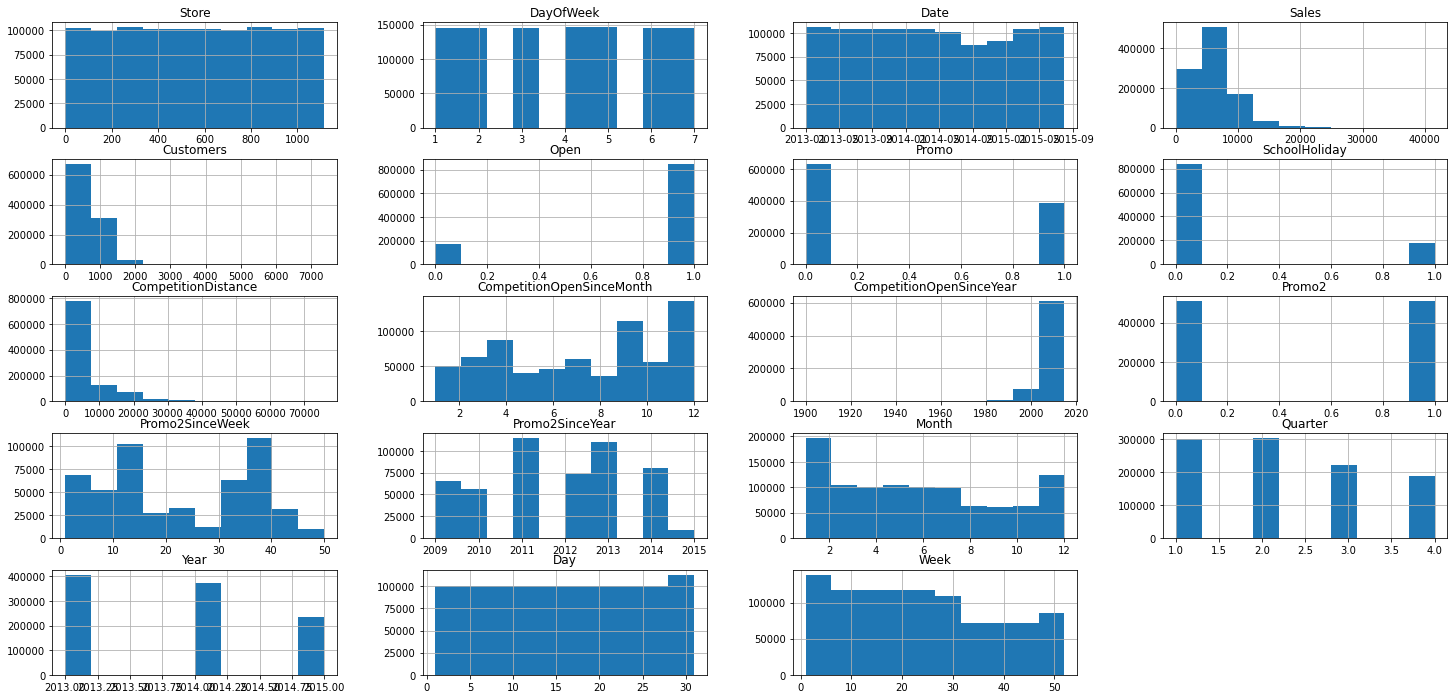

In [149]:
df.hist(figsize=(25,12))

<AxesSubplot:>

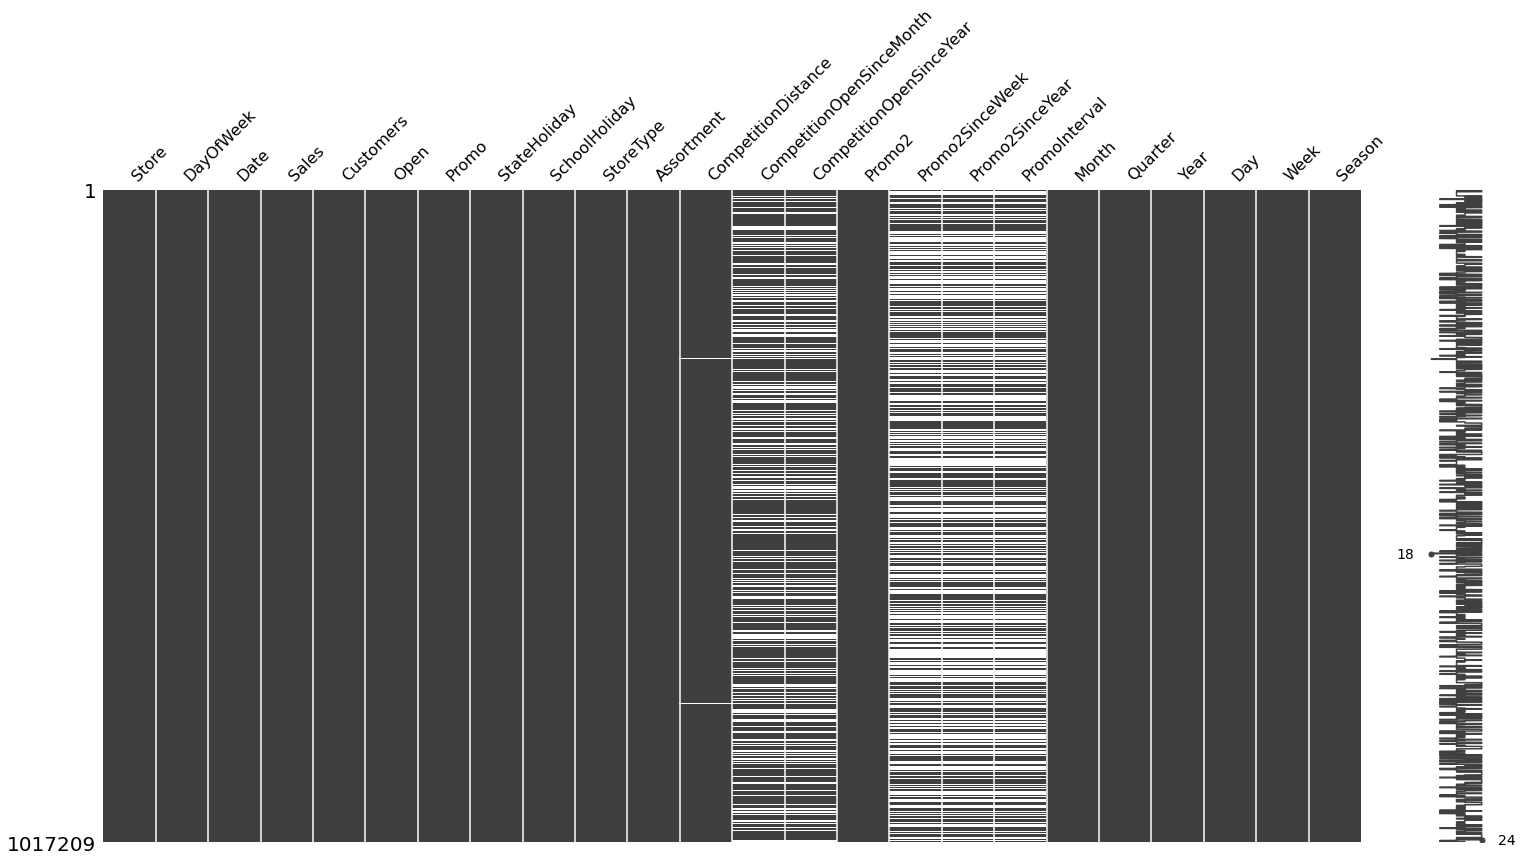

In [150]:
### 결측지 직관적 확인
import missingno

missingno.matrix(df, figsize=(25,12))

In [151]:
df.isnull().sum() / df.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [152]:
### CompetitionDistance의 결측치는 mean 값으로 대체할 수 있을 것 같다. fillna 함수를 이용하자.
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean())
df['CompetitionDistance'].isnull().sum()

0

<AxesSubplot:>

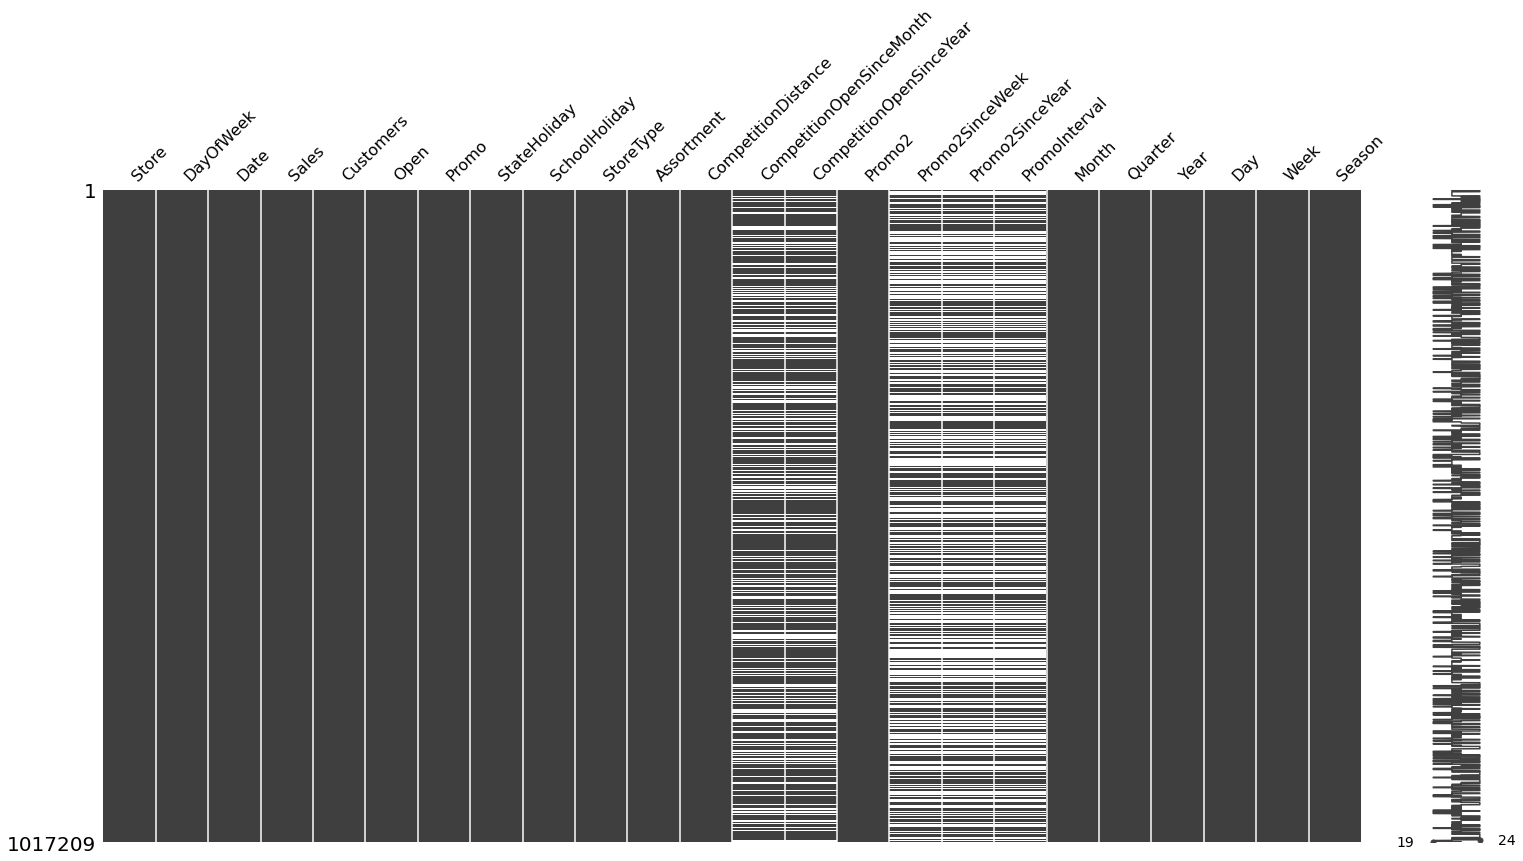

In [153]:
missingno.matrix(df, figsize=(25,12))

In [154]:
### 30% 이상의 결측을 보이는 변수를 제거하고, 범주형 자료를 one-hot 벡터로 자료를 변환한다.
### n_columns : 결측치가 많은 자료를 '제외한' 변수들을 모아 놓음
### categ_columns : 범주형 변수들을 모아 놓음

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

n_columns = []
n_columns = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categ_columns = []
categ_columns = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

In [155]:
### LabelEncoder : 범주형 변수를 0 ~ (범주수 - 1)까지 수치화한다.
### OneHotEncoder : Label encoding된 자료를 one-hot encoding으로 전환하는 class 함수

def dummy(data, col):
    """label encoding과 one-hot 코딩을 처리하기 위한 함수"""
    lab = LabelEncoder() # 0 ~ c-1로 클래스 부여
    aa = lab.fit_transform(data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse = False)
    column_names = [col+ '_' + str(i) for i in lab.classes_]
    return(pd.DataFrame(ohe.fit_transform(aa), columns=column_names))

In [156]:
### dummy 함수의 요소인 데이터셋 df를 제공
### col은 categ_columns에 있는 변수를 하나씩 제공받는다.

fdata = df[n_columns]
for column in categ_columns:
    temp_df = dummy(df, column)
    fdata = pd.concat([fdata, temp_df], axis = 1)
fdata.head(15)

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,555,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,546,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,523,1,1,0,0,1,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,560,1,1,0,0,1,1270.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,612,1,1,0,0,1,1270.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,0,0,0,0,0,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,500,1,0,0,0,0,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,459,1,0,0,0,0,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,503,1,0,0,0,0,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,463,1,0,0,0,0,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [157]:
fdata.shape

(1017209, 44)

In [158]:
fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [159]:
fdata['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [160]:
### '0'은 휴일이 아닌 날, 'a'는 공휴일, 'b'는 부활절, 'c'는 크리스마스를 의미한다.
### 원칙적으로는 one-hot encoding해야 되지만, 휴일인 날은 0, 휴일이 아닌 날은 1인 이항변수로 분류해도 될 것 같다.

fdata['StateHoliday'] = np.where(fdata['StateHoliday']=='0', 0, 1)

In [162]:
fdata['StateHoliday'].unique()

array([0, 1])

# 2.4 불균형자료(Imbalanced data)의 처리

- 불균형자료 : 머신러닝의 목적이 분류일 때, 특정 클래스의 관측치가 다른 클래스에 비해 매우 낮게 나타나는 것
- 과소표집 : 다수클래스의 표본을 임의로 학습데이터로부터 제거하는 것
- 과대표집 : 소수클래스의 표본을 복제하여 이를 학습데이터에 추가하는 것
 - SMOTE(합성소수표집법) : 과대표집의 한 종류
 - ADASYN(조절합성표집법) : 과대표집의 한 종류

In [163]:
!pip3 install imblearn

In [168]:
### 인위적으로 3개 클래스를 가진 2000개의 불균형자료를 생성
### 불균형자료의 비율은 3 : 7 : 90

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

X, y = make_classification(n_classes=3, weights = [0.03, 0.07, 0.9], n_features=10, n_clusters_per_class=1, n_samples=2000, random_state=10)
print(f"Original dataset shape {Counter(y)}")

### 원래의 자료는 클래스1 : 클래스2 : 클래스3 = 64 : 141 : 1795

Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [171]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(f"Resampled dataset shape {Counter(y_res)}")

### SMOTE에 의한 합성표본의 결과는 클래스1 : 클래스2 : 클래스3 = 1795 : 1795 : 1795

Resampled dataset shape Counter({2: 1795, 1: 1795, 0: 1795})


In [173]:
ada = ADASYN(random_state=0)
X_syn, y_syn = ada.fit_resample(X, y)
print(f"Resampled dataset shape {Counter(y_syn)}")

### ADASYN에 의한 합성표본의 결과는 클래스1 : 클래스2 : 클래스3 = 1795 : 1795 : 1805

Resampled dataset shape Counter({1: 1805, 2: 1795, 0: 1795})
